### Loan Application Status Prediction

Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

### Importing Library

In [151]:
#data lib
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#tunning lib
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#save

import pickle

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [87]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
data.shape

(685, 14)

In [89]:
data['Loan_ID'].nunique()

614

### Data Cleaning

In [90]:
data.drop(columns=['Loan_ID'],inplace=True)

In [91]:
data.shape

(614, 12)

### Null Testing

In [92]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Credit history is most important feature in any loan application, model can predict wrongly in case we replace nan with mean,median. so here we are removing these nan. 

In [93]:
data.drop(index=data[data['Credit_History'].isnull()].index,inplace=True)

In [94]:
data.isna().sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing Features

In [95]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
si=SimpleImputer()
data['LoanAmount']=si.fit_transform(data[['LoanAmount']])

In [98]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      472
CoapplicantIncome    261
LoanAmount           195
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    object 
 11  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.3+ KB


### Encoding Features

In [101]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [102]:
data['Dependents'].value_counts()

0     331
2      95
1      90
3+     48
Name: Dependents, dtype: int64

Due to value 3+ feature showing as object lets convert it in whole number.

In [104]:
data['Dependents'].replace('3+',3,inplace=True)

In [105]:
data = pd.get_dummies(data, columns = ['Property_Area'])

In [106]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,145.088398,360.0,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,0,0
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,0,1


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   564 non-null    int64  
 1   Married                  564 non-null    int64  
 2   Dependents               564 non-null    object 
 3   Education                564 non-null    int64  
 4   Self_Employed            564 non-null    int64  
 5   ApplicantIncome          564 non-null    int64  
 6   CoapplicantIncome        564 non-null    float64
 7   LoanAmount               564 non-null    float64
 8   Loan_Amount_Term         564 non-null    float64
 9   Credit_History           564 non-null    float64
 10  Loan_Status              564 non-null    int64  
 11  Property_Area_Rural      564 non-null    uint8  
 12  Property_Area_Semiurban  564 non-null    uint8  
 13  Property_Area_Urban      564 non-null    uint8  
dtypes: float64(4), int64(6), o

Dataset cleaned now & have no any non numeric data.

### Duplicacy Test

In [108]:
data.duplicated().sum()

0

### Data Imbalancing

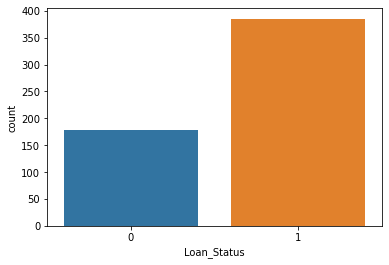

In [109]:
sns.countplot(data['Loan_Status'])
plt.show()

In [110]:
data['Loan_Status'].value_counts()

1    385
0    179
Name: Loan_Status, dtype: int64

In [111]:
data0=data[data['Loan_Status']==0]
data1=data[data['Loan_Status']==1]

In [112]:
from sklearn.utils import resample

In [113]:
data0up=resample(data0,n_samples=300,random_state=91)

In [114]:
data=pd.concat([data1,data0up],axis=0)

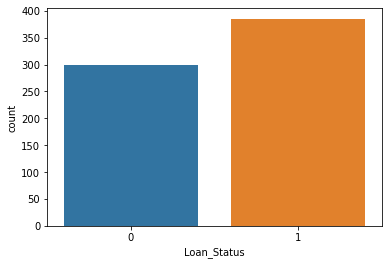

In [115]:
sns.countplot(data['Loan_Status'])
plt.show()

Data was imbalance we applied resample technique & upsample data, now data is balanced.

In [116]:
data.shape

(685, 14)

### Describe

In [117]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,685.000000,685.000000,685.000000,685.000000,685.00000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,0.811679,0.623358,0.792701,0.141606,5938.29927,1555.319591,149.111772,342.937226,0.800000,0.562044,0.313869,0.359124,0.327007
std,0.391254,0.484898,0.405668,0.348900,7817.01715,2916.337732,85.847403,63.476596,0.400292,0.496498,0.464403,0.480094,0.469463
min,0.000000,0.000000,0.000000,0.000000,150.00000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2947.00000,0.000000,103.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3941.00000,997.000000,129.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5923.00000,2223.000000,164.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.00000,33837.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dataset looks good and have equal count

### Correlation & multicollinearity

In [118]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.349958,-0.062098,0.013571,0.069214,0.147851,0.137853,-0.096371,-0.007468,0.056473,0.092443,-0.145336,0.057180
Married,0.349958,1.000000,-0.055617,0.021900,0.057356,0.039792,0.125878,-0.099091,0.055738,0.121497,0.025827,-0.027293,0.002363
Education,-0.062098,-0.055617,1.000000,0.001116,0.145180,0.050020,0.174890,0.107026,0.041415,0.056692,-0.073185,0.052514,0.018693
Self_Employed,0.013571,0.021900,0.001116,1.000000,0.091580,-0.010005,0.111118,-0.029370,-0.069089,-0.038132,-0.031086,0.010168,0.020353
ApplicantIncome,0.069214,0.057356,0.145180,0.091580,1.000000,-0.110152,0.558232,-0.017312,-0.096324,-0.071239,0.088901,-0.058095,-0.028532
CoapplicantIncome,0.147851,0.039792,0.050020,-0.010005,-0.110152,1.000000,0.093197,0.011351,0.038688,-0.031782,0.019646,-0.046351,0.027967
LoanAmount,0.137853,0.125878,0.174890,0.111118,0.558232,0.093197,1.000000,0.049031,-0.023196,-0.076012,0.147112,-0.064381,-0.079687
Loan_Amount_Term,-0.096371,-0.099091,0.107026,-0.029370,-0.017312,0.011351,0.049031,1.000000,-0.034385,-0.021470,0.089692,-0.009334,-0.079180
Credit_History,-0.007468,0.055738,0.041415,-0.069089,-0.096324,0.038688,-0.023196,-0.034385,1.000000,0.514929,-0.039323,0.047166,-0.009336
Loan_Status,0.056473,0.121497,0.056692,-0.038132,-0.071239,-0.031782,-0.076012,-0.021470,0.514929,1.000000,-0.132135,0.182390,-0.055810


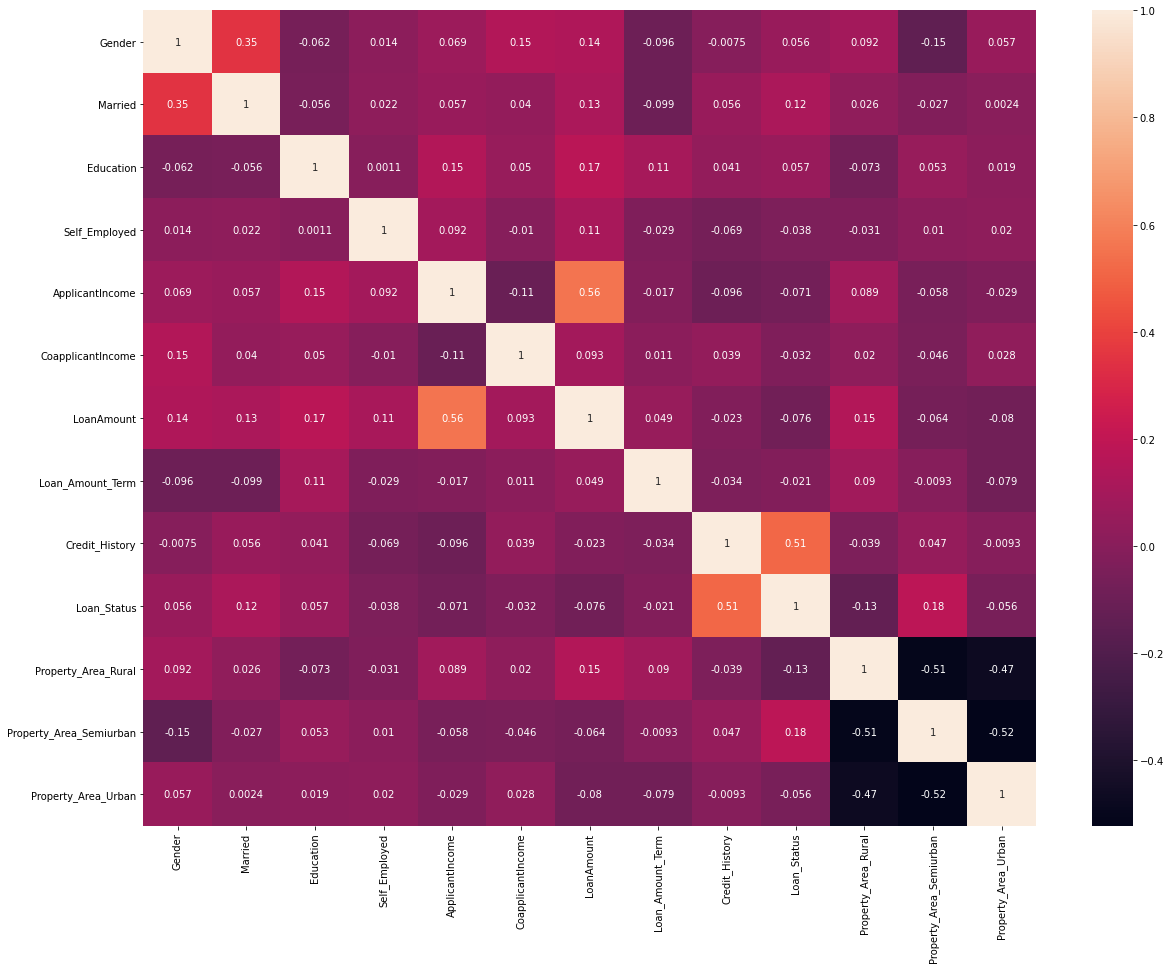

In [123]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

No multicollinearity found in dataset.
Credit history is most impactful feature.
rest all features have very less impact.

In [125]:
data.corrwith(data['Loan_Status'])

Gender                     0.056473
Married                    0.121497
Education                  0.056692
Self_Employed             -0.038132
ApplicantIncome           -0.071239
CoapplicantIncome         -0.031782
LoanAmount                -0.076012
Loan_Amount_Term          -0.021470
Credit_History             0.514929
Loan_Status                1.000000
Property_Area_Rural       -0.132135
Property_Area_Semiurban    0.182390
Property_Area_Urban       -0.055810
dtype: float64

Feature selection-not applying feature selection because we have very less dataset.

### Distplot

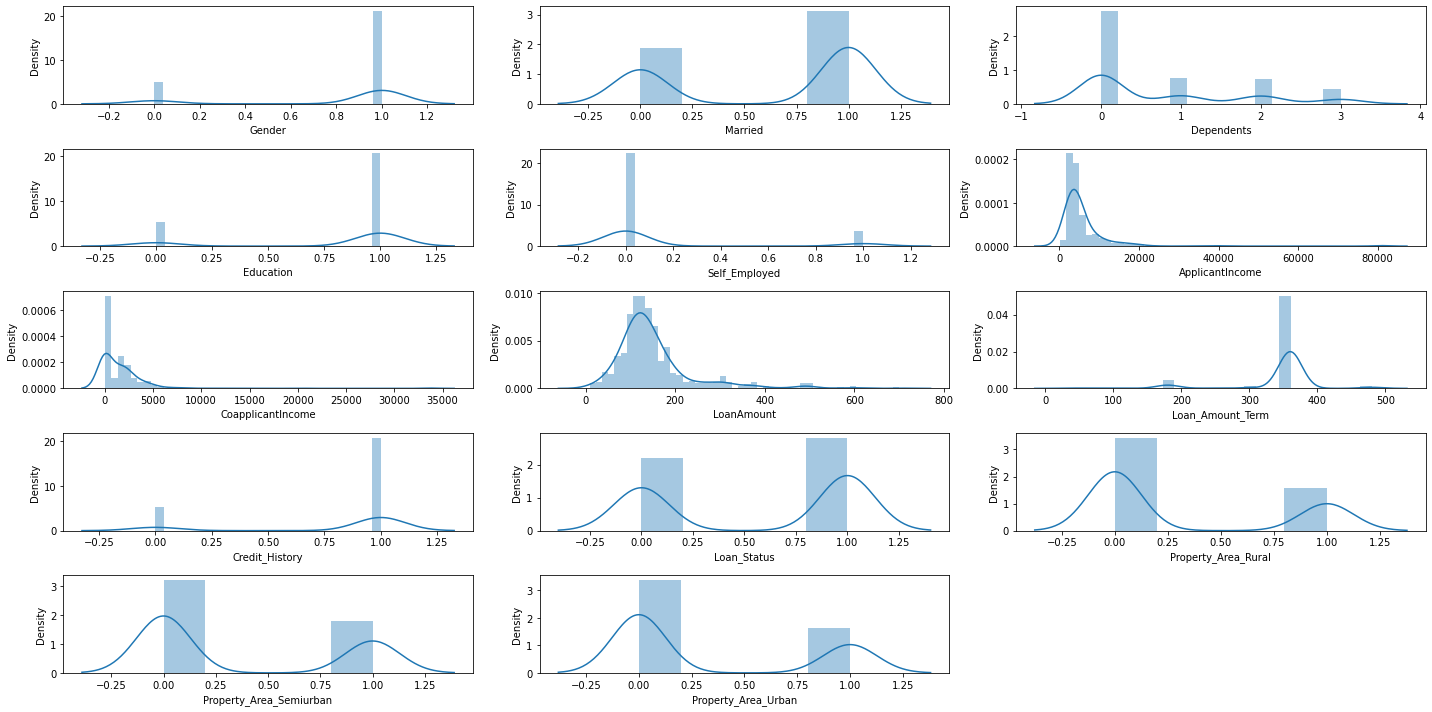

In [126]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data :
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

most of the features are categorical so we cant expect any normal distribution here.

### Skewness

In [134]:
data.skew()

Gender                    -1.597895
Married                   -0.510288
Dependents                 1.013480
Education                 -1.447281
Self_Employed              2.060438
ApplicantIncome            6.627019
CoapplicantIncome          6.965796
LoanAmount                 2.414755
Loan_Amount_Term          -2.364715
Credit_History            -1.503294
Loan_Status               -0.250657
Property_Area_Rural        0.803942
Property_Area_Semiurban    0.588586
Property_Area_Urban        0.739140
dtype: float64

few features are skewed but no need to remove skewness because data set is small and looks good to go.

### Split Dataset

In [136]:
#dataset split

X=data.drop(columns=['Loan_Status'])
y=data.Loan_Status

### Standard Scaling

In [137]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Train Test Split

In [143]:
# testing best random state
for i in range(10,100,3):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)

    print(lr.score(x_train,y_train)*100,i)

74.85380116959064 10
77.38791423001949 13
76.80311890838206 16
75.24366471734892 19
76.41325536062378 22
74.26900584795322 25
75.43859649122807 28
76.41325536062378 31
76.41325536062378 34
74.46393762183236 37
74.6588693957115 40
74.46393762183236 43
76.41325536062378 46
74.46393762183236 49
74.46393762183236 52
74.26900584795322 55
74.26900584795322 58
76.60818713450293 61
75.6335282651072 64
73.87914230019493 67
77.97270955165692 70
76.41325536062378 73
74.46393762183236 76
75.82846003898635 79
74.6588693957115 82
75.04873294346979 85
75.6335282651072 88
77.58284600389864 91
74.6588693957115 94
74.6588693957115 97


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=91)

### Model Building

In [152]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
svm=SVC()

In [156]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
svm.fit(x_train,y_train)

SVC()

In [157]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

72.09302325581395


In [158]:
#rfc score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

88.95348837209302


In [159]:
#gbc score

y_pred=gbc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

77.32558139534885


In [160]:
#svm score

y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

74.4186046511628


### Cross Validation

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,x_scale,y))*100)

print('GradientBoostClassifier score:',np.mean(cross_val_score(gbc,x_scale,y))*100)

print('SVM score:',np.mean(cross_val_score(svm,x_scale,y))*100)

Logistic Regression score: 73.43065693430657
Random Forest score: 89.19708029197079
GradientBoostClassifier score: 78.83211678832117
SVM score: 77.81021897810218


### Cross validation score 89.19% of Random Forest is maximum and close to test so would be our final model.

In [163]:
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.88      0.91      0.90        90

    accuracy                           0.89       172
   macro avg       0.89      0.89      0.89       172
weighted avg       0.89      0.89      0.89       172



### HyperparameterTunning

In [165]:
params={'n_estimators':[5,25,70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2,4,12],
        'min_samples_leaf':[2,5,10],
        'max_depth':[5,10,20]        
        
    
}

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [188]:
rfr=RandomForestClassifier(criterion= 'gini',
 max_depth= 13,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 90)

rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

90.11627906976744


### Improved score after tunning its 90%

### Final Evaluation

In [189]:
confusion_matrix(y_test,y_pred)

array([[72, 10],
       [ 7, 83]], dtype=int64)

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        82
           1       0.89      0.92      0.91        90

    accuracy                           0.90       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.90      0.90      0.90       172



Model is performing well and its generalised model.

In [192]:
from sklearn.metrics import plot_roc_curve

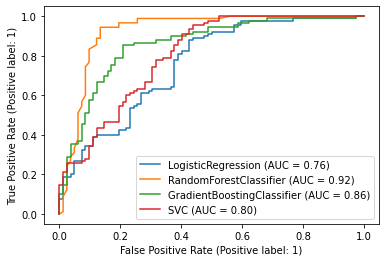

In [194]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)

plt.show()

### AUC_ROC score for random forest classifier is 92%

### Model Save

In [195]:
filename='Loan_status.pickle'
pickle.dump(rfc,open(filename,'wb'))